In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv('../01_data_collection/redfin_data.csv')

In [3]:
df.shape

(1656, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sold Price         1649 non-null   float64
 1   Beds               1649 non-null   float64
 2   Baths              1649 non-null   float64
 3   Floors             1632 non-null   float64
 4   Garage Spaces      1656 non-null   int64  
 5   Lot Size (sq ft)   1653 non-null   float64
 6   Home Size (sq ft)  1655 non-null   float64
 7   Year Built         1653 non-null   float64
 8   School Score Avg   1515 non-null   float64
 9   Walk Score         1538 non-null   float64
 10  Transit Score      1538 non-null   float64
 11  Bike Score         1538 non-null   float64
 12  Laundry            1656 non-null   bool   
 13  Heating            1656 non-null   bool   
 14  Air Conditioning   1656 non-null   bool   
 15  Pool               1656 non-null   bool   
 16  Address            1656 

In [5]:
## clean data

df.drop(columns=['Address', 'Sold Status', 'URL'], inplace = True)

df = df.dropna()
df.reset_index(drop=True, inplace=True)

df.columns= df.columns.str.lower()
df.rename(columns={'lot size (sq ft)': 'lot size', 'home size (sq ft)': 'home size'}, inplace=True)

df.drop(df.index[df['city'] == 'SAN JOSE'], inplace=True)

df.drop(df.index[df['city'] == 'EAST PALO ALTO'], inplace=True)

df.drop(df.index[df['county'] == 'SAN MATEO COUNTY'], inplace=True)

df.drop(columns=['county', 'zip code', 'property type'], inplace = True)

df['age of house'] = (df['year built'].max() + 1) - df['year built']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1297 non-null   float64
 1   beds              1297 non-null   float64
 2   baths             1297 non-null   float64
 3   floors            1297 non-null   float64
 4   garage spaces     1297 non-null   int64  
 5   lot size          1297 non-null   float64
 6   home size         1297 non-null   float64
 7   year built        1297 non-null   float64
 8   school score avg  1297 non-null   float64
 9   walk score        1297 non-null   float64
 10  transit score     1297 non-null   float64
 11  bike score        1297 non-null   float64
 12  laundry           1297 non-null   bool   
 13  heating           1297 non-null   bool   
 14  air conditioning  1297 non-null   bool   
 15  pool              1297 non-null   bool   
 16  city              1297 non-null   object 


In [7]:
## create basic dataframe for basic pairplot
df_temp = df.drop(columns=['year built', 'walk score', 'transit score', 'bike score',
                           'city', 'laundry', 'heating', 'air conditioning', 'pool'])

In [8]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1297 non-null   float64
 1   beds              1297 non-null   float64
 2   baths             1297 non-null   float64
 3   floors            1297 non-null   float64
 4   garage spaces     1297 non-null   int64  
 5   lot size          1297 non-null   float64
 6   home size         1297 non-null   float64
 7   school score avg  1297 non-null   float64
 8   age of house      1297 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 101.3 KB


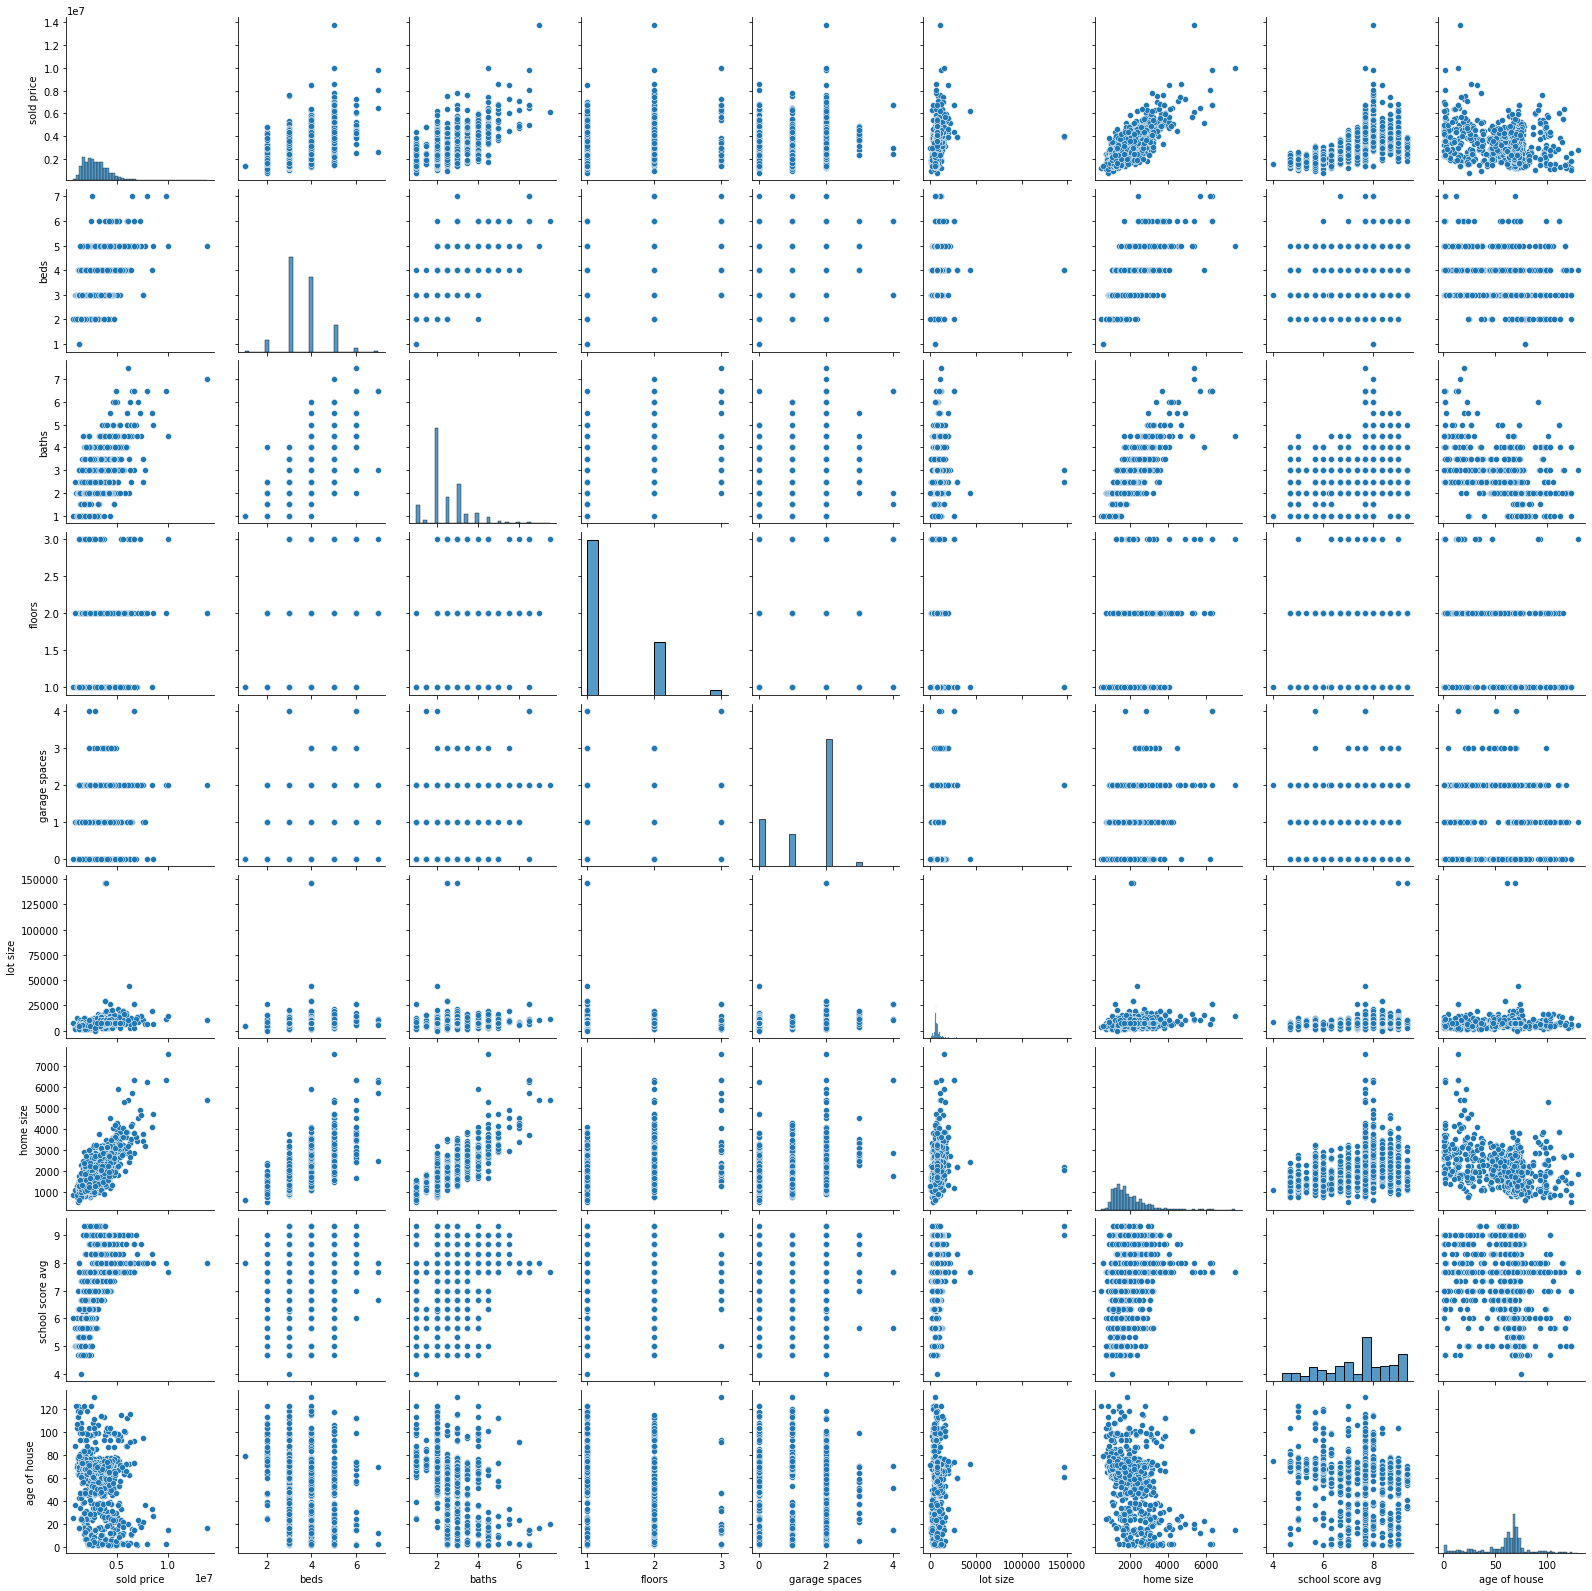

In [9]:
sns.pairplot(df_temp);

In [10]:
df['sold price'].describe()

count    1.297000e+03
mean     3.042164e+06
std      1.260630e+06
min      7.750000e+05
25%      2.100000e+06
50%      2.828000e+06
75%      3.709113e+06
max      1.380700e+07
Name: sold price, dtype: float64

In [11]:
df.sort_values(by=['sold price'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
126,13807000.0,5.0,7.0,2.0,2,10497.960,5366.0,2007.0,8.000000,59.0,38.0,96.0,True,True,True,True,PALO ALTO,16.0
1326,10000000.0,5.0,4.5,3.0,2,14671.008,7536.0,2009.0,7.666667,49.0,40.0,81.0,True,True,True,True,LOS ALTOS,14.0
105,9800000.0,7.0,6.5,2.0,2,11913.660,6304.0,2021.0,8.000000,40.0,35.0,75.0,True,True,True,True,PALO ALTO,2.0
344,8592002.0,5.0,5.0,2.0,0,6734.376,4708.0,1996.0,8.000000,44.0,35.0,70.0,False,False,False,True,PALO ALTO,27.0
1325,8500000.0,4.0,5.5,1.0,2,19074.924,4079.0,1990.0,8.333333,69.0,25.0,98.0,True,True,True,True,LOS ALTOS,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1105000.0,2.0,1.0,1.0,1,4321.152,864.0,1916.0,5.666667,74.0,43.0,92.0,True,True,True,False,SANTA CLARA,107.0
1085,1020000.0,3.0,2.0,1.0,0,4499.748,880.0,1900.0,5.000000,69.0,50.0,75.0,False,True,False,True,SANTA CLARA,123.0
1036,1000000.0,3.0,1.0,1.0,1,3384.612,937.0,1935.0,5.000000,58.0,41.0,55.0,True,True,True,True,SANTA CLARA,88.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [12]:
df.drop([126], inplace=True)
df.sort_values(by=['sold price'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
1326,10000000.0,5.0,4.5,3.0,2,14671.008,7536.0,2009.0,7.666667,49.0,40.0,81.0,True,True,True,True,LOS ALTOS,14.0
105,9800000.0,7.0,6.5,2.0,2,11913.660,6304.0,2021.0,8.000000,40.0,35.0,75.0,True,True,True,True,PALO ALTO,2.0
344,8592002.0,5.0,5.0,2.0,0,6734.376,4708.0,1996.0,8.000000,44.0,35.0,70.0,False,False,False,True,PALO ALTO,27.0
1325,8500000.0,4.0,5.5,1.0,2,19074.924,4079.0,1990.0,8.333333,69.0,25.0,98.0,True,True,True,True,LOS ALTOS,33.0
327,8010300.0,7.0,6.5,2.0,0,6734.376,6200.0,2021.0,8.000000,0.0,0.0,2.0,False,False,False,True,PALO ALTO,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1105000.0,2.0,1.0,1.0,1,4321.152,864.0,1916.0,5.666667,74.0,43.0,92.0,True,True,True,False,SANTA CLARA,107.0
1085,1020000.0,3.0,2.0,1.0,0,4499.748,880.0,1900.0,5.000000,69.0,50.0,75.0,False,True,False,True,SANTA CLARA,123.0
1036,1000000.0,3.0,1.0,1.0,1,3384.612,937.0,1935.0,5.000000,58.0,41.0,55.0,True,True,True,True,SANTA CLARA,88.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [13]:
df.sort_values(by=['sold price'], ascending=True)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
1161,775000.0,2.0,1.0,1.0,0,7649.136,863.0,1998.0,6.000000,87.0,51.0,84.0,False,False,False,True,SANTA CLARA,25.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0
1036,1000000.0,3.0,1.0,1.0,1,3384.612,937.0,1935.0,5.000000,58.0,41.0,55.0,True,True,True,True,SANTA CLARA,88.0
1085,1020000.0,3.0,2.0,1.0,0,4499.748,880.0,1900.0,5.000000,69.0,50.0,75.0,False,True,False,True,SANTA CLARA,123.0
1201,1105000.0,2.0,1.0,1.0,1,4321.152,864.0,1916.0,5.666667,74.0,43.0,92.0,True,True,True,False,SANTA CLARA,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,8010300.0,7.0,6.5,2.0,0,6734.376,6200.0,2021.0,8.000000,0.0,0.0,2.0,False,False,False,True,PALO ALTO,2.0
1325,8500000.0,4.0,5.5,1.0,2,19074.924,4079.0,1990.0,8.333333,69.0,25.0,98.0,True,True,True,True,LOS ALTOS,33.0
344,8592002.0,5.0,5.0,2.0,0,6734.376,4708.0,1996.0,8.000000,44.0,35.0,70.0,False,False,False,True,PALO ALTO,27.0
105,9800000.0,7.0,6.5,2.0,2,11913.660,6304.0,2021.0,8.000000,40.0,35.0,75.0,True,True,True,True,PALO ALTO,2.0


In [14]:
df.sort_values(by=['lot size'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
951,3888000.0,4.0,3.0,1.0,2,146361.600,2187.0,1962.0,9.333333,13.0,0.0,24.0,True,True,True,True,CUPERTINO,61.0
952,3950000.0,4.0,2.5,1.0,2,146361.600,2071.0,1954.0,9.000000,44.0,19.0,52.0,True,True,False,True,CUPERTINO,69.0
165,6200000.0,4.0,2.0,1.0,0,43703.748,2411.0,1951.0,7.666667,30.0,32.0,77.0,True,True,True,False,PALO ALTO,72.0
948,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
866,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1884020.0,3.0,3.5,3.0,2,1398.276,2231.0,2010.0,7.666667,65.0,39.0,72.0,True,True,True,True,SANTA CLARA,13.0
800,1818000.0,4.0,3.5,2.0,2,1319.868,1725.0,2007.0,4.666667,51.0,41.0,73.0,True,True,True,True,SUNNYVALE,16.0
494,1600000.0,3.0,3.5,3.0,2,1306.800,1612.0,2007.0,7.333333,56.0,37.0,85.0,True,True,True,False,MOUNTAIN VIEW,16.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [15]:
df.drop([951,952], inplace=True)
df.sort_values(by=['lot size'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
165,6200000.0,4.0,2.0,1.0,0,43703.748,2411.0,1951.0,7.666667,30.0,32.0,77.0,True,True,True,False,PALO ALTO,72.0
866,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
948,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
1383,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
293,6700000.0,6.0,6.5,3.0,4,25944.336,6338.0,2009.0,7.666667,22.0,36.0,80.0,True,True,True,True,LOS ALTOS,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1884020.0,3.0,3.5,3.0,2,1398.276,2231.0,2010.0,7.666667,65.0,39.0,72.0,True,True,True,True,SANTA CLARA,13.0
800,1818000.0,4.0,3.5,2.0,2,1319.868,1725.0,2007.0,4.666667,51.0,41.0,73.0,True,True,True,True,SUNNYVALE,16.0
494,1600000.0,3.0,3.5,3.0,2,1306.800,1612.0,2007.0,7.333333,56.0,37.0,85.0,True,True,True,False,MOUNTAIN VIEW,16.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [16]:
df.sort_values(by=['lot size'], ascending=True)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
1410,2950000.0,2.0,2.0,1.0,0,0.000,1318.0,1952.0,8.333333,87.0,27.0,97.0,True,True,False,True,LOS ALTOS,71.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0
494,1600000.0,3.0,3.5,3.0,2,1306.800,1612.0,2007.0,7.333333,56.0,37.0,85.0,True,True,True,False,MOUNTAIN VIEW,16.0
800,1818000.0,4.0,3.5,2.0,2,1319.868,1725.0,2007.0,4.666667,51.0,41.0,73.0,True,True,True,True,SUNNYVALE,16.0
1256,1884020.0,3.0,3.5,3.0,2,1398.276,2231.0,2010.0,7.666667,65.0,39.0,72.0,True,True,True,True,SANTA CLARA,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,6700000.0,6.0,6.5,3.0,4,25944.336,6338.0,2009.0,7.666667,22.0,36.0,80.0,True,True,True,True,LOS ALTOS,14.0
1383,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
948,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
866,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0


In [17]:
df.drop([1410], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1293 non-null   float64
 1   beds              1293 non-null   float64
 2   baths             1293 non-null   float64
 3   floors            1293 non-null   float64
 4   garage spaces     1293 non-null   int64  
 5   lot size          1293 non-null   float64
 6   home size         1293 non-null   float64
 7   year built        1293 non-null   float64
 8   school score avg  1293 non-null   float64
 9   walk score        1293 non-null   float64
 10  transit score     1293 non-null   float64
 11  bike score        1293 non-null   float64
 12  laundry           1293 non-null   bool   
 13  heating           1293 non-null   bool   
 14  air conditioning  1293 non-null   bool   
 15  pool              1293 non-null   bool   
 16  city              1293 non-null   object 


In [19]:
df['beds'].value_counts()

3.0    576
4.0    455
5.0    163
2.0     69
6.0     24
7.0      4
1.0      2
Name: beds, dtype: int64

In [20]:
df['baths'].value_counts()

2.0    582
3.0    238
2.5    160
1.0    109
4.0     59
3.5     56
4.5     37
1.5     21
5.0     15
6.5      6
6.0      5
5.5      4
7.5      1
Name: baths, dtype: int64

In [21]:
df['floors'].value_counts()

1.0    943
2.0    322
3.0     28
Name: floors, dtype: int64

In [22]:
df['garage spaces'].value_counts()

2    775
0    286
1    199
3     29
4      4
Name: garage spaces, dtype: int64

In [23]:
df.corr()

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,age of house
sold price,1.000000,0.530492,0.608565,0.295525,0.070803,0.495573,0.776482,0.261373,0.637453,-0.273004,-0.351729,0.056721,0.030058,-0.052177,0.033257,0.095984,-0.261373
beds,0.530492,1.000000,0.684862,0.419186,0.158194,0.285794,0.729702,0.313947,0.245496,-0.249280,-0.232945,-0.119357,0.040732,0.049096,0.156342,0.072869,-0.313947
baths,0.608565,0.684862,1.000000,0.517454,0.109036,0.229351,0.825005,0.467915,0.247759,-0.165196,-0.166594,-0.026364,0.028231,-0.005671,0.202059,0.062296,-0.467915
floors,0.295525,0.419186,0.517454,1.000000,0.100936,-0.051633,0.535945,0.488101,0.141769,-0.080864,-0.023820,0.008005,0.043062,0.039051,0.173748,0.047888,-0.488101
garage spaces,0.070803,0.158194,0.109036,0.100936,1.000000,0.195348,0.152825,0.157010,0.064918,-0.123687,-0.098051,-0.173139,0.142090,0.737359,0.440811,0.064374,-0.157010
lot size,0.495573,0.285794,0.229351,-0.051633,0.195348,1.000000,0.390393,-0.041140,0.328632,-0.288571,-0.307440,-0.205835,-0.014230,0.125264,0.065769,0.055809,0.041140
home size,0.776482,0.729702,0.825005,0.535945,0.152825,0.390393,1.000000,0.437366,0.353453,-0.228356,-0.236633,-0.052901,0.031583,0.004332,0.190462,0.097545,-0.437366
year built,0.261373,0.313947,0.467915,0.488101,0.157010,-0.041140,0.437366,1.000000,0.133168,-0.143399,-0.123727,-0.050551,0.015086,0.035175,0.212903,0.055295,-1.000000
school score avg,0.637453,0.245496,0.247759,0.141769,0.064918,0.328632,0.353453,0.133168,1.000000,-0.336722,-0.488138,-0.037539,-0.050016,-0.037007,-0.052159,0.142711,-0.133168
walk score,-0.273004,-0.249280,-0.165196,-0.080864,-0.123687,-0.288571,-0.228356,-0.143399,-0.336722,1.000000,0.587088,0.609317,0.008337,-0.005186,-0.013298,-0.056230,0.143399


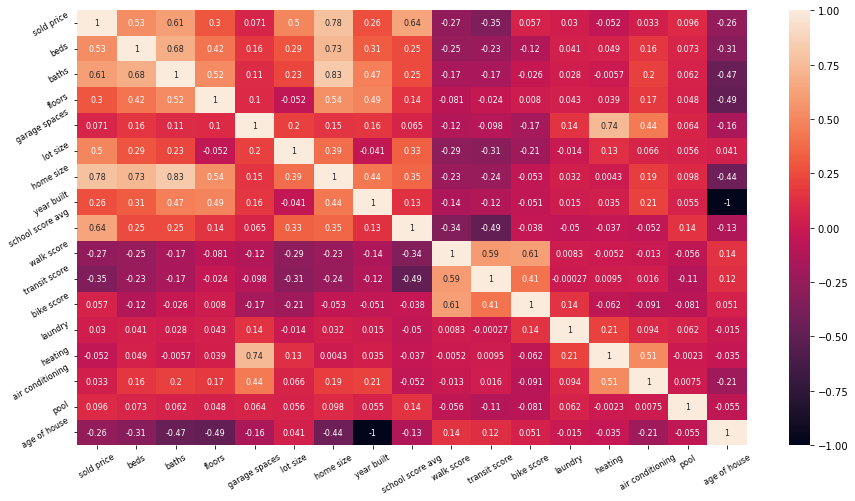

In [24]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(df.corr(), annot=True, annot_kws={'size':8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, size=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, size=8);

In [25]:
df.drop(columns=['year built'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1293 non-null   float64
 1   beds              1293 non-null   float64
 2   baths             1293 non-null   float64
 3   floors            1293 non-null   float64
 4   garage spaces     1293 non-null   int64  
 5   lot size          1293 non-null   float64
 6   home size         1293 non-null   float64
 7   school score avg  1293 non-null   float64
 8   walk score        1293 non-null   float64
 9   transit score     1293 non-null   float64
 10  bike score        1293 non-null   float64
 11  laundry           1293 non-null   bool   
 12  heating           1293 non-null   bool   
 13  air conditioning  1293 non-null   bool   
 14  pool              1293 non-null   bool   
 15  city              1293 non-null   object 
 16  age of house      1293 non-null   float64


In [26]:
df.describe()

,sold price,beds,baths,floors,garage spaces,lot size,home size,school score avg,walk score,transit score,bike score,age of house
count,1.293000e+03,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,3.032554e+06,3.615623,2.467517,1.292343,1.432328,7374.017374,1897.996906,7.293503,55.607889,36.519722,78.615623,59.702243
std,1.226021e+06,0.868241,0.930493,0.500382,0.867065,3286.268673,781.070539,1.248069,18.799130,8.471531,13.003452,22.460326
min,7.750000e+05,1.000000,1.000000,1.000000,0.000000,1097.712000,528.000000,4.000000,0.000000,0.000000,2.000000,1.000000
25%,2.100000e+06,3.000000,2.000000,1.000000,1.000000,5684.580000,1357.000000,6.333333,43.000000,32.000000,71.000000,55.000000
50%,2.828000e+06,3.000000,2.000000,1.000000,2.000000,6682.104000,1740.000000,7.666667,58.000000,38.000000,78.000000,66.000000
75%,3.700000e+06,4.000000,3.000000,2.000000,2.000000,8289.468000,2264.000000,8.333333,70.000000,42.000000,88.000000,70.000000
max,1.000000e+07,7.000000,7.500000,3.000000,4.000000,43703.748000,7536.000000,9.333333,95.000000,58.000000,100.000000,130.000000


In [27]:
df['walk score'].sort_values()

327      0.0
965      3.0
882      7.0
346      7.0
1001     8.0
        ... 
623     93.0
561     93.0
336     93.0
244     95.0
462     95.0
Name: walk score, Length: 1293, dtype: float64

In [28]:
df['transit score'].sort_values()

895      0.0
953      0.0
1004     0.0
940      0.0
327      0.0
        ... 
522     53.0
562     53.0
509     55.0
366     55.0
315     58.0
Name: transit score, Length: 1293, dtype: float64

In [29]:
df['bike score'].sort_values()

327       2.0
1354     20.0
948      26.0
866      26.0
1383     26.0
        ...  
132     100.0
187     100.0
326     100.0
321     100.0
452     100.0
Name: bike score, Length: 1293, dtype: float64

In [30]:
df_temp = df.drop(columns=['walk score', 'transit score', 'bike score'])

In [31]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1293 non-null   float64
 1   beds              1293 non-null   float64
 2   baths             1293 non-null   float64
 3   floors            1293 non-null   float64
 4   garage spaces     1293 non-null   int64  
 5   lot size          1293 non-null   float64
 6   home size         1293 non-null   float64
 7   school score avg  1293 non-null   float64
 8   laundry           1293 non-null   bool   
 9   heating           1293 non-null   bool   
 10  air conditioning  1293 non-null   bool   
 11  pool              1293 non-null   bool   
 12  city              1293 non-null   object 
 13  age of house      1293 non-null   float64
dtypes: bool(4), float64(8), int64(1), object(1)
memory usage: 116.2+ KB


In [32]:
bool_cols = {
                'laundry': int,
                'heating': int,
                'air conditioning': int,
                'pool': int
               }
  
df_temp = df_temp.astype(bool_cols)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1293 non-null   float64
 1   beds              1293 non-null   float64
 2   baths             1293 non-null   float64
 3   floors            1293 non-null   float64
 4   garage spaces     1293 non-null   int64  
 5   lot size          1293 non-null   float64
 6   home size         1293 non-null   float64
 7   school score avg  1293 non-null   float64
 8   laundry           1293 non-null   int64  
 9   heating           1293 non-null   int64  
 10  air conditioning  1293 non-null   int64  
 11  pool              1293 non-null   int64  
 12  city              1293 non-null   object 
 13  age of house      1293 non-null   float64
dtypes: float64(8), int64(5), object(1)
memory usage: 151.5+ KB


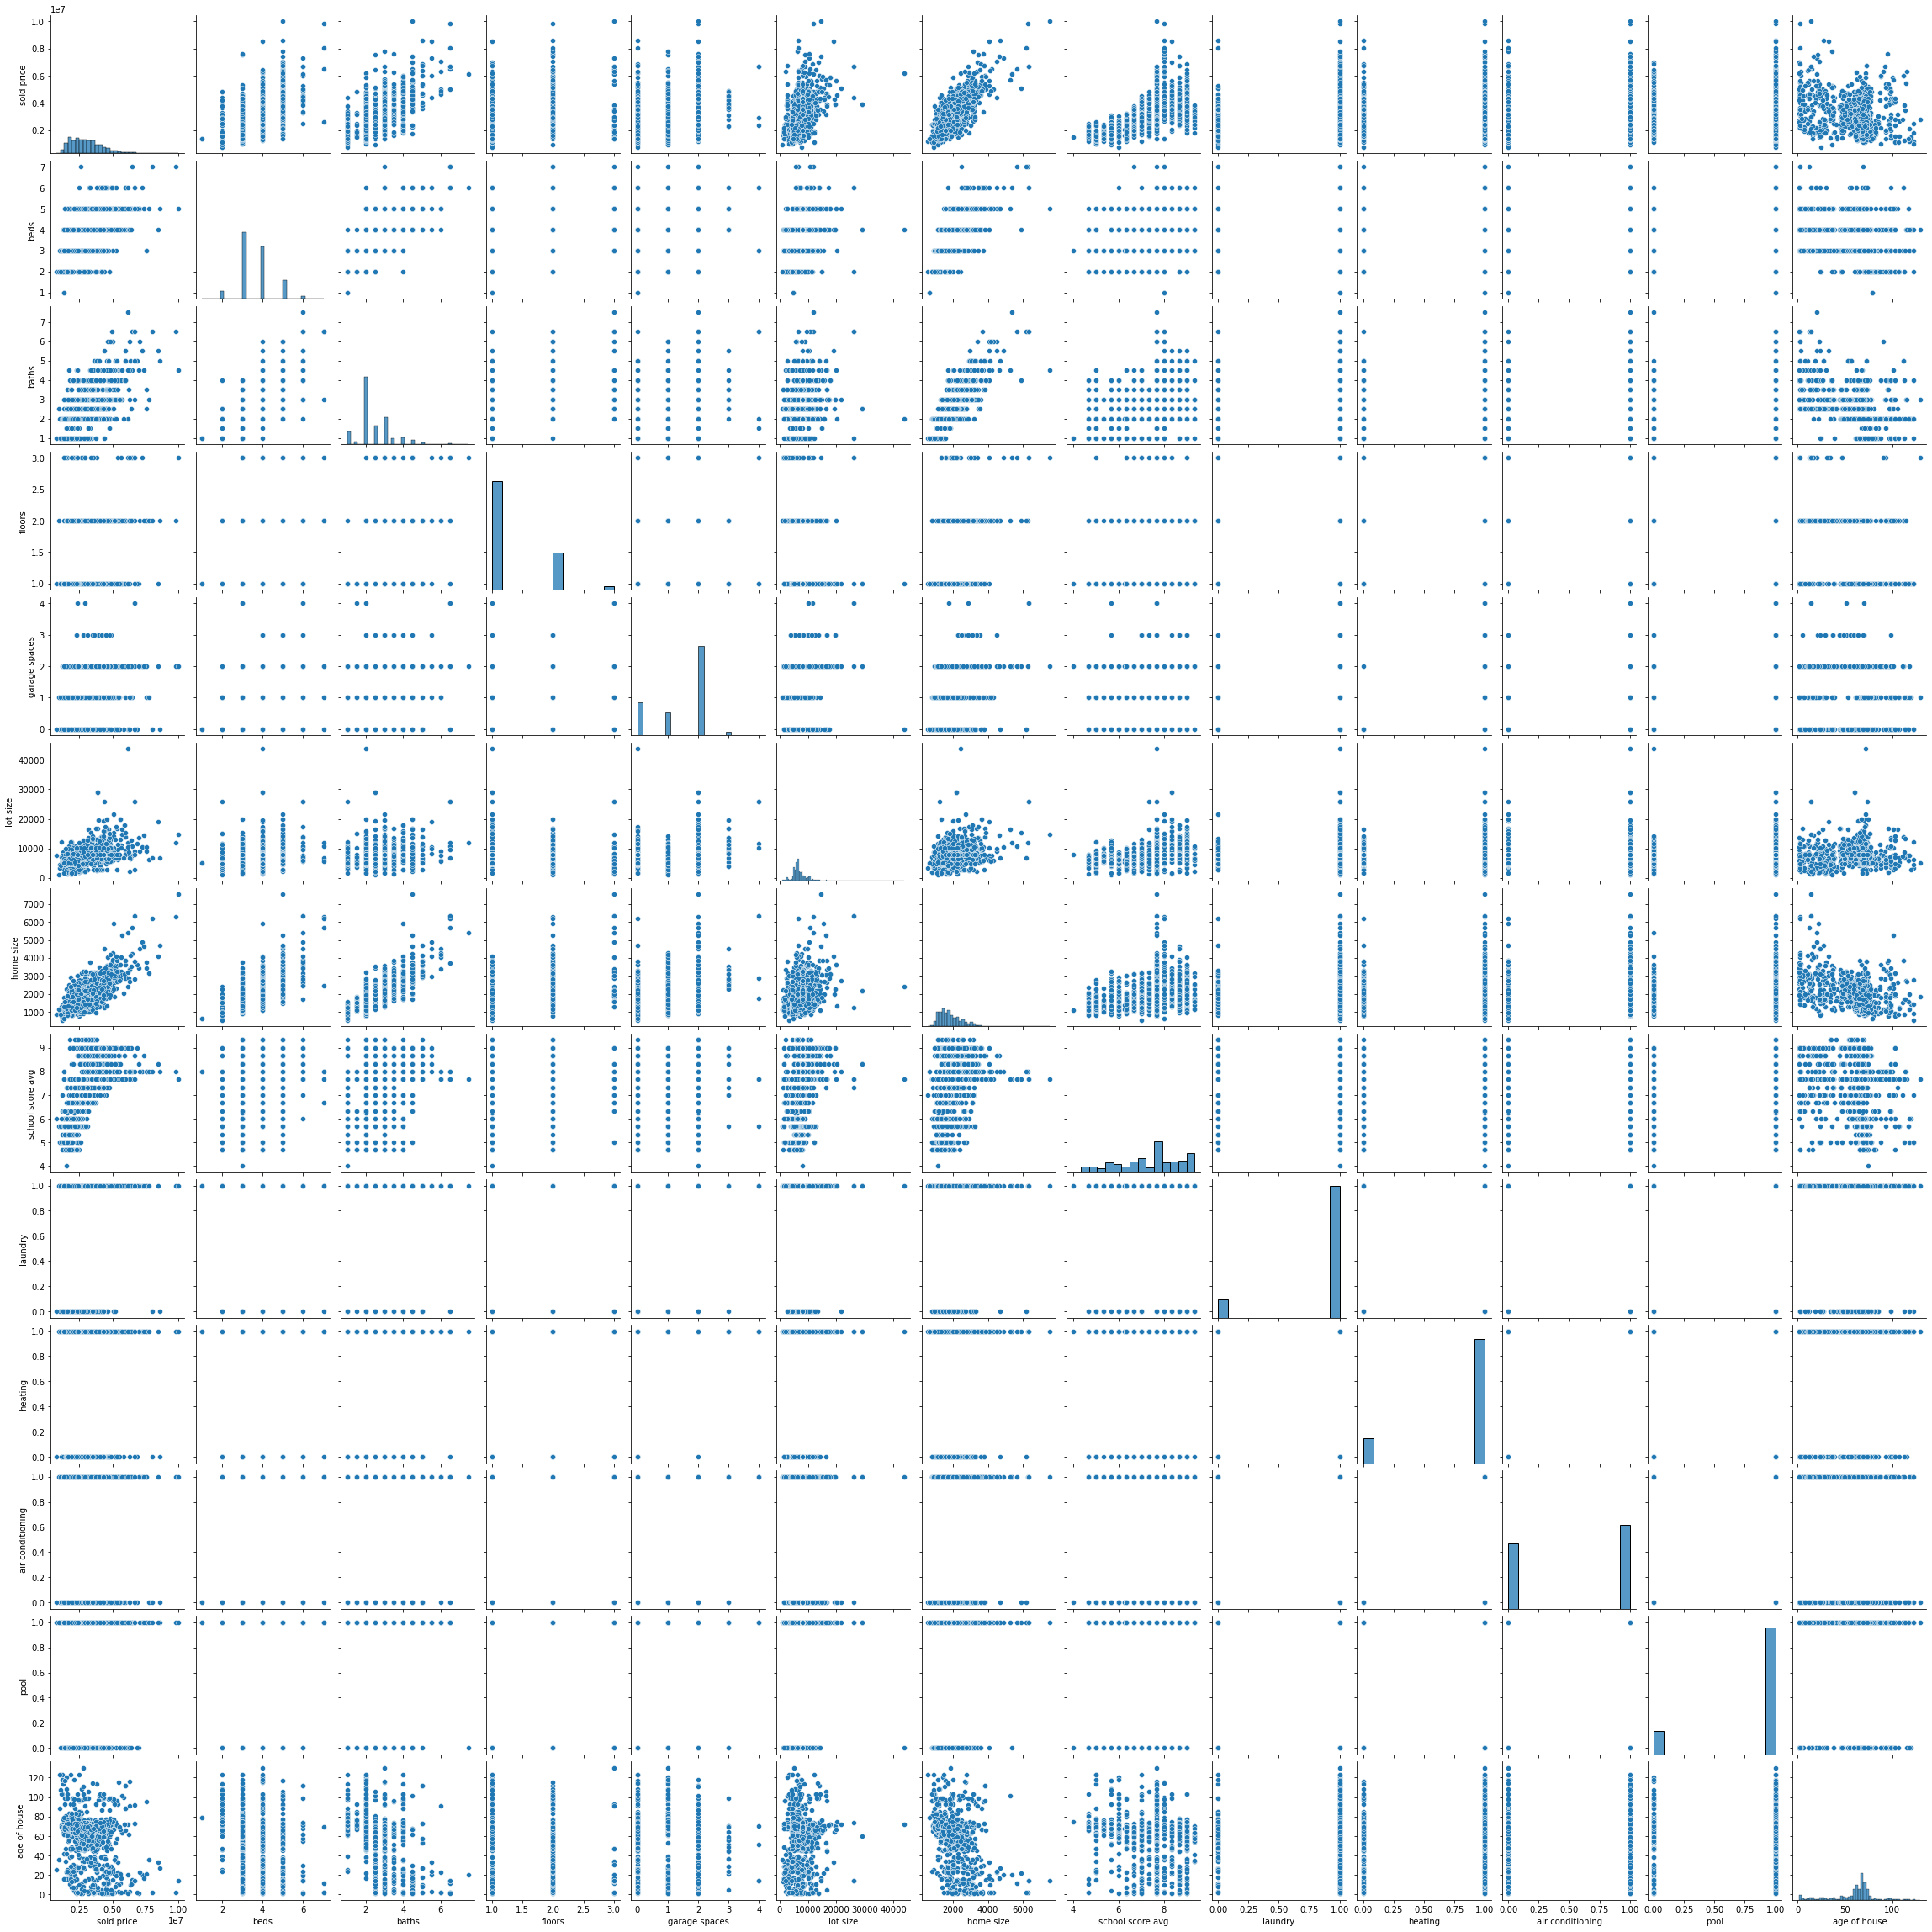

In [33]:
sns.pairplot(df_temp.drop(columns='city'));

In [34]:
bool_cols = {
                'beds': str,
                'baths': str,
                'floors': str,
                'garage spaces': str
               }
  
df_temp = df_temp.astype(bool_cols)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1293 non-null   float64
 1   beds              1293 non-null   object 
 2   baths             1293 non-null   object 
 3   floors            1293 non-null   object 
 4   garage spaces     1293 non-null   object 
 5   lot size          1293 non-null   float64
 6   home size         1293 non-null   float64
 7   school score avg  1293 non-null   float64
 8   laundry           1293 non-null   int64  
 9   heating           1293 non-null   int64  
 10  air conditioning  1293 non-null   int64  
 11  pool              1293 non-null   int64  
 12  city              1293 non-null   object 
 13  age of house      1293 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 183.8+ KB


In [35]:
df_temp['beds'].value_counts()

3.0    576
4.0    455
5.0    163
2.0     69
6.0     24
7.0      4
1.0      2
Name: beds, dtype: int64

In [36]:
bed_count = df_temp['beds'].value_counts()

bed_one = list(bed_count[bed_count == 2].index)
df_temp['beds'] = df_temp['beds'].replace(bed_one, '1-2')

bed_two = list(bed_count[bed_count == 69].index)
df_temp['beds'] = df_temp['beds'].replace(bed_two, '1-2')

bed_six = list(bed_count[bed_count == 24].index)
df_temp['beds'] = df_temp['beds'].replace(bed_six, '6+')

bed_seven = list(bed_count[bed_count == 4].index)
df_temp['beds'] = df_temp['beds'].replace(bed_seven, '6+')

df_temp['beds'].value_counts()

3.0    576
4.0    455
5.0    163
1-2     71
6+      28
Name: beds, dtype: int64

In [37]:
df_temp['baths'].value_counts()

2.0    582
3.0    238
2.5    160
1.0    109
4.0     59
3.5     56
4.5     37
1.5     21
5.0     15
6.5      6
6.0      5
5.5      4
7.5      1
Name: baths, dtype: int64

In [38]:
bath_count = df_temp['baths'].value_counts()

bath_6plus = list(bath_count[bath_count <= 6].index)
df_temp['baths'] = df_temp['baths'].replace(bath_6plus, '6+')

df_temp['baths'].value_counts()

2.0    582
3.0    238
2.5    160
1.0    109
4.0     59
3.5     56
4.5     37
1.5     21
6+      16
5.0     15
Name: baths, dtype: int64

In [39]:
df_temp['floors'].value_counts()

1.0    943
2.0    322
3.0     28
Name: floors, dtype: int64

In [40]:
df_temp['garage spaces'].value_counts()

2    775
0    286
1    199
3     29
4      4
Name: garage spaces, dtype: int64

In [41]:
garage_count = df_temp['garage spaces'].value_counts()

garage_3plus = list(garage_count[garage_count <= 29].index)
df_temp['garage spaces'] = df_temp['garage spaces'].replace(garage_3plus, '3+')

df_temp['garage spaces'].value_counts()

2     775
0     286
1     199
3+     33
Name: garage spaces, dtype: int64

In [42]:
df_dummies = pd.get_dummies(df_temp, columns=['beds', 'baths', 'floors', 'garage spaces', 'city'], drop_first=True)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1439
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sold price          1293 non-null   float64
 1   lot size            1293 non-null   float64
 2   home size           1293 non-null   float64
 3   school score avg    1293 non-null   float64
 4   laundry             1293 non-null   int64  
 5   heating             1293 non-null   int64  
 6   air conditioning    1293 non-null   int64  
 7   pool                1293 non-null   int64  
 8   age of house        1293 non-null   float64
 9   beds_3.0            1293 non-null   uint8  
 10  beds_4.0            1293 non-null   uint8  
 11  beds_5.0            1293 non-null   uint8  
 12  beds_6+             1293 non-null   uint8  
 13  baths_1.5           1293 non-null   uint8  
 14  baths_2.0           1293 non-null   uint8  
 15  baths_2.5           1293 non-null   uint8  
 16  baths_

In [43]:
df_dummies.corr()

,sold price,lot size,home size,school score avg,laundry,heating,air conditioning,pool,age of house,beds_3.0,...,floors_2.0,floors_3.0,garage spaces_1,garage spaces_2,garage spaces_3+,city_LOS ALTOS,city_MOUNTAIN VIEW,city_PALO ALTO,city_SANTA CLARA,city_SUNNYVALE
sold price,1.000000,0.495573,0.776482,0.637453,0.030058,-0.052177,0.033257,0.095984,-0.261373,-0.403470,...,0.278505,0.094047,-0.111467,0.034812,0.133887,0.421027,-0.016922,0.433192,-0.448300,-0.245311
lot size,0.495573,1.000000,0.390393,0.328632,-0.014230,0.125264,0.065769,0.055809,0.041140,-0.229630,...,-0.044915,-0.021994,-0.159310,0.120644,0.207446,0.441816,-0.101877,0.048737,-0.167372,-0.140826
home size,0.776482,0.390393,1.000000,0.353453,0.031583,0.004332,0.190462,0.097545,-0.437366,-0.507175,...,0.464664,0.230595,-0.113710,0.051410,0.239895,0.293041,-0.042825,0.196868,-0.228583,-0.158483
school score avg,0.637453,0.328632,0.353453,1.000000,-0.050016,-0.037007,-0.052159,0.142711,-0.133168,-0.217304,...,0.149309,0.021786,-0.178787,0.076791,0.096887,0.309333,0.035047,0.349123,-0.517175,-0.264892
laundry,0.030058,-0.014230,0.031583,-0.050016,1.000000,0.211829,0.093681,0.061526,-0.015086,-0.021122,...,0.035066,0.021897,0.077425,0.074574,0.044367,-0.016133,0.121867,0.085213,0.051701,-0.106014
heating,-0.052177,0.125264,0.004332,-0.037007,0.211829,1.000000,0.508160,-0.002280,-0.035175,0.006946,...,0.019334,0.038376,0.191532,0.545077,0.072677,-0.037343,-0.021248,-0.048832,0.042022,0.045497
air conditioning,0.033257,0.065769,0.190462,-0.052159,0.093681,0.508160,1.000000,0.007496,-0.212903,-0.076565,...,0.141289,0.088647,0.078888,0.298506,0.123253,-0.023030,-0.006699,-0.121450,0.106623,0.033865
pool,0.095984,0.055809,0.097545,0.142711,0.061526,-0.002280,0.007496,1.000000,-0.055295,-0.053256,...,0.052323,0.004555,-0.073484,0.062443,0.041842,0.001197,0.064463,-0.019755,0.023422,-0.105400
age of house,-0.261373,0.041140,-0.437366,-0.133168,-0.015086,-0.035175,-0.212903,-0.055295,1.000000,0.180027,...,-0.420908,-0.213389,0.012816,-0.093793,-0.096583,0.012935,-0.078124,0.009819,0.152012,-0.022512
beds_3.0,-0.403470,-0.229630,-0.507175,-0.217304,-0.021122,0.006946,-0.076565,-0.053256,0.180027,1.000000,...,-0.329034,-0.047823,0.057569,-0.007125,-0.125318,-0.148951,0.005844,-0.152359,0.144495,0.115843


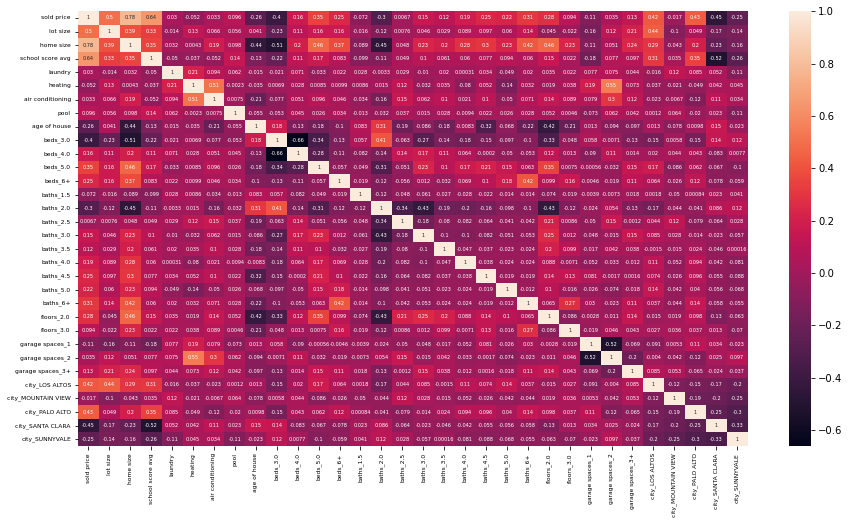

In [44]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(df_dummies.corr(), annot=True, annot_kws={'size':5})
ax.set_xticklabels(ax.get_xticklabels(), size=6)
ax.set_yticklabels(ax.get_yticklabels(), size=6);